# "What makes people in a country happy?"

I love unconventional economical data and the world happiness report does fit into that category quit well. I gave it a try and visualized a few findings. 

Happy reading! 


Anna-Marie 



PS: I am more than happy to recive any feedback and nudges for future work. If you want me to elaborate on any points, just write me a message. 

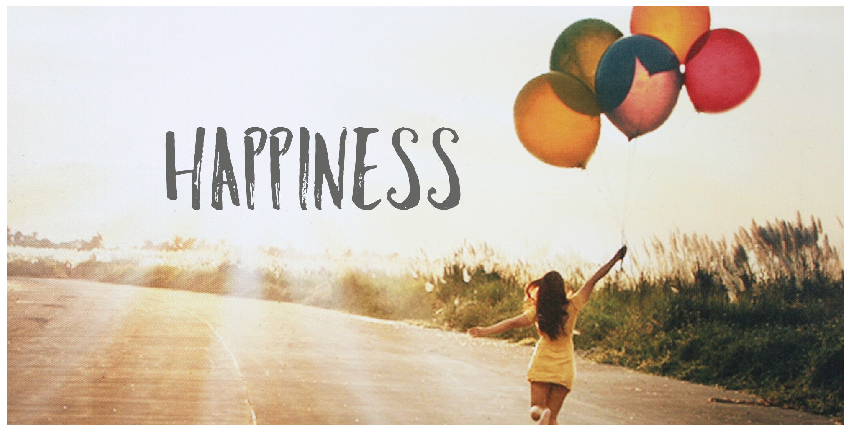

In [1]:
#import of the necessary libaries and define their names 

import numpy as np 

import seaborn as sns 
sns.set_style("whitegrid")

import statsmodels.api as sm 


import pandas as pd 

import matplotlib.pyplot as plt
#to have the graphs in jupyter
%matplotlib inline
import matplotlib.image as mpimg # only neccesary for the picture 


#libaries for ML model (predictive analysis)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split




#upload a happy picture! 
img= mpimg.imread("HappinessImage.jpeg")
plt.figure(figsize=(15,11)) #make picture larger 
imgplot = plt.imshow(img) 
plt.axis ("off") #remove the axis and tickers 
plt.show()

- Context and data source (kaggle.com) 
https://www.kaggle.com/unsdsn/world-happiness

- for help with the graphical representation I used this (amazing) webside: http://python-graph-gallery.com


# Analysis includes: 

- explore and discribe data 
- merge data from 2015-2019 
- clean data (replace NaN values and delete redudant variables) 
- visualize data (and safe charts) 
- prediction analyzis (with ML)
- interpretation and answer reseach quesiton (what makes people in a country happy?)
- data cleaning (replace values, check NA and NaN) 
- merging of yearly datasets 
- statistical discribtion of data 
- upload picture 
- correlation heatmap (with and without mirrow) 
- OLS analysis (with & and without dummy variables for countries) 
- sorted barplots (by region, ... ) 

In [2]:
#import csv datasets and safe as pandas DataFrame
happy15_df = pd.read_csv ("datasets_894_813759_2015.csv")
happy16_df = pd.read_csv ("datasets_894_813759_2016.csv")
happy17_df = pd.read_csv ("datasets_894_813759_2017.csv")
happy18_df = pd.read_csv ("datasets_894_813759_2018.csv")
happy19_df = pd.read_csv ("datasets_894_813759_2019.csv")

#and we have a look at the last one (head is by default with the first 5 rows)
happy19_df.head()



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# inspect datasets

In [3]:
#shape 
print (" Shape15:" , happy15_df.shape ,"\n",
       "Shape16:" , happy16_df.shape ,"\n",
       "Shape17:" , happy17_df.shape ,"\n",
       "Shape18:" , happy18_df.shape ,"\n",
       "Shape19:" , happy19_df.shape  )




 Shape15: (158, 12) 
 Shape16: (157, 13) 
 Shape17: (155, 12) 
 Shape18: (156, 9) 
 Shape19: (156, 9)


There are more criteria in the first years while merging we have to keep that in mind. Further, the different number of countries is an additional concern... one of them is the dystopia.residual (which is the hypothetically worst-case state and delivers the baseline with which you can compare the other states).

In [4]:
#values and data types of the 5 datasets 
print ( happy15_df.info() 
       , happy16_df.info() 
       , happy17_df.info()
       , happy18_df.info() 
       , happy19_df.info())

print ("different data labels, and confirmation of different variables")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

use of concatenate formula:
    axis = 0, python stacks the data under the data 
    axis = 1, python stacks the data right to the data 
    
- imortant: if labeles are the same the data can is automatically put in the right column/ row 

In [5]:
"""
renaming of year 2018 and 2019 
labeling as the base: 2015
Note: very important otherwise we 
will create new colums as soon as we merge the data
"""

#Country 

happy18_df = happy18_df.rename(columns= {"Country or region": "Country"})

happy18_df

happy19_df = happy18_df.rename(columns= {"Country or region": "Country"})

happy19_df


#Happiness Rank 

happy18_df = happy18_df.rename(columns= {"Overall rank": "Happiness Rank"})

happy18_df

happy19_df = happy18_df.rename(columns= {"Overall rank": "Happiness Rank"})

happy19_df



#Economy (GDP per Capita)

happy18_df = happy18_df.rename(columns= {"GDP per capita": "Economy (GDP per Capita)"})

happy18_df

happy19_df = happy18_df.rename(columns= {"GDP per capita": "Economy (GDP per Capita)"})

happy19_df


#Health (Life Expectancy)

happy18_df = happy18_df.rename(columns= {"Healthy life expectancy": "Health (Life Expectancy)"})

happy18_df

happy19_df = happy18_df.rename(columns= {"Healthy life expectancy": "Health (Life Expectancy)"})

happy19_df


#Freedom

happy18_df = happy18_df.rename(columns= {"Freedom to make life choices": "Freedom"})

happy18_df

happy19_df = happy18_df.rename(columns= {"Freedom to make life choices": "Freedom"})

happy19_df


#Trust (Government Corruption)

happy18_df = happy18_df.rename(columns= {"Perceptions of corruption": "Trust (Government Corruption)"})

happy18_df

happy19_df = happy18_df.rename(columns= {"Perceptions of corruption": "Trust (Government Corruption)"})

happy19_df


#Family 

happy18_df = happy18_df.rename(columns= {"Social support": "Family"})

happy18_df

happy19_df = happy18_df.rename(columns= {"Social support": "Family"})

happy19_df


#Happiness Score 

happy18_df = happy18_df.rename(columns= {"Score": "Happiness Score"})

happy18_df

happy19_df = happy18_df.rename(columns= {"Score": "Happiness Score"})

happy15_df



,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [6]:
"""
renaming of year 2017
base label: 2015
"""

happy17_df = happy17_df.rename(columns = {"Happiness.Rank": "Happiness Rank"})

happy17_df = happy17_df.rename(columns = {"Happiness.Score": "Happiness Score"})

happy17_df = happy17_df.rename(columns = {"Economy..GDP.per.Capita.": "Economy (GDP per Capita)"})

happy17_df = happy17_df.rename(columns = {"Health..Life.Expectancy.": "Health (Life Expectancy)"})

happy17_df = happy17_df.rename(columns = {"Trust..Government.Corruption.": "Trust (Government Corruption)"})

happy17_df = happy17_df.rename(columns = {"Dystopia.Residual": "Dystopia Residual"})

#because we already know that we want to delete thouse filds 

happy17_df = happy17_df.drop(columns = "Whisker.high") 

happy17_df = happy17_df.drop(columns = "Whisker.low")

happy17_df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [7]:
#insert year column at first position (index 0)

#2015
happy15_df.insert(0, "Year",value = "2015")


#2016
happy16_df.insert(0, "Year",value = "2016")


#2017
happy17_df.insert(0, "Year",value = "2017")


#2018
happy18_df.insert(0, "Year",value = "2018")

#2019
happy19_df.insert(0, "Year",value = "2019")

#check if it worked
happy18_df.head()

,Year,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,2018,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2018,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,2018,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,2018,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,2018,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


___

# Preperation for filling in the missing values 

Note: in most cases data is incomplete. Although we have a very complete and well labeled dataset some values are not given. The missing values are of categorial data type and, therefore, have to be replaced with categories rather than simply with fillna() (fill in NaN (Not A Number) valus with like the mean, with previous once, with next one,  the most frequent value, meadian, 0, or any other numerical data )


Alteration: we can also solve the issue with the blow stated replacement oportunity! 



create an dictonary of countries and regions using DataFrame.to_dict()

In [8]:
#creating empty dict 
region_dict ={}

#filling with values from DataFame happy15_df 

#index to have each row with both data, region and country 
region_dict = happy15_df [["Country","Region"]].to_dict("index")



[print (key, value) for key, value in region_dict.items()]

0 {'Country': 'Switzerland', 'Region': 'Western Europe'}
1 {'Country': 'Iceland', 'Region': 'Western Europe'}
2 {'Country': 'Denmark', 'Region': 'Western Europe'}
3 {'Country': 'Norway', 'Region': 'Western Europe'}
4 {'Country': 'Canada', 'Region': 'North America'}
5 {'Country': 'Finland', 'Region': 'Western Europe'}
6 {'Country': 'Netherlands', 'Region': 'Western Europe'}
7 {'Country': 'Sweden', 'Region': 'Western Europe'}
8 {'Country': 'New Zealand', 'Region': 'Australia and New Zealand'}
9 {'Country': 'Australia', 'Region': 'Australia and New Zealand'}
10 {'Country': 'Israel', 'Region': 'Middle East and Northern Africa'}
11 {'Country': 'Costa Rica', 'Region': 'Latin America and Caribbean'}
12 {'Country': 'Austria', 'Region': 'Western Europe'}
13 {'Country': 'Mexico', 'Region': 'Latin America and Caribbean'}
14 {'Country': 'United States', 'Region': 'North America'}
15 {'Country': 'Brazil', 'Region': 'Latin America and Caribbean'}
16 {'Country': 'Luxembourg', 'Region': 'Western Europ

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# Mergin the datasets 

In [9]:
#concatenating objects 

#defintion of all the sets we want to bring together
frames = [happy15_df, happy16_df,  happy17_df, happy18_df, happy19_df]

happiness = pd.concat (frames)
happiness.info()

#what we see is that "Trust" is not in one line yet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           782 non-null    object 
 1   Country                        782 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 782 non-null    int64  
 4   Happiness Score                782 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       782 non-null    float64
 7   Family                         782 non-null    float64
 8   Health (Life Expectancy)       782 non-null    float64
 9   Freedom                        782 non-null    float64
 10  Trust (Government Corruption)  780 non-null    float64
 11  Generosity                     782 non-null    float64
 12  Dystopia Residual              470 non-null    flo

 Delete unnessesary columns:  


In [10]:
happiness = happiness.drop (["Lower Confidence Interval","Dystopia Residual", "Upper Confidence Interval", "Standard Error"], axis = 1)
happiness.head()



,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [11]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           782 non-null    object 
 1   Country                        782 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 782 non-null    int64  
 4   Happiness Score                782 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  780 non-null    float64
 10  Generosity                     782 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 73.3+ KB


Note: year is a object type and we have to convert it 

In [12]:
#conversion of type str to float64 (alternatively: int)
happiness ["Year"] = happiness ["Year"].astype(int)

#convert object data to category data 
happiness ["Country"] = happiness ["Country"].astype("category")
#happiness ["Region"] = happiness ["Region"].astype("category")

happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Year                           782 non-null    int64   
 1   Country                        782 non-null    category
 2   Region                         315 non-null    object  
 3   Happiness Rank                 782 non-null    int64   
 4   Happiness Score                782 non-null    float64 
 5   Economy (GDP per Capita)       782 non-null    float64 
 6   Family                         782 non-null    float64 
 7   Health (Life Expectancy)       782 non-null    float64 
 8   Freedom                        782 non-null    float64 
 9   Trust (Government Corruption)  780 non-null    float64 
 10  Generosity                     782 non-null    float64 
dtypes: category(1), float64(7), int64(2), object(1)
memory usage: 75.0+ KB


a more visual way of presenting the null values: 

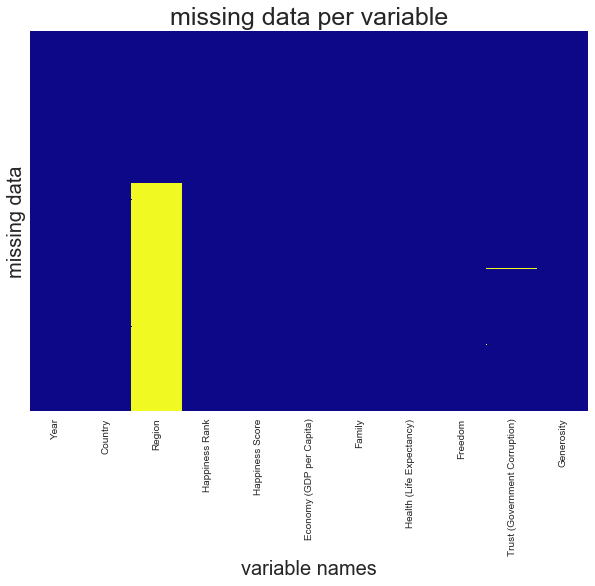

In [13]:
#yellow is what is missig and we see that is substential 

plt.figure (figsize=(10,7))

sns.heatmap(happiness.isnull(),yticklabels=False, cbar = False, cmap = "plasma")
plt.xlabel(xlabel = "variable names", rotation= 0, fontsize= 20)
plt.ylabel (ylabel= "missing data", fontsize = 20)
plt.title (label = "missing data per variable",  fontsize = 25)
plt.show()




prior we made a dictionary with the regional data categories that we not fil in 

# Filling missing values 


options: pandas.DataFrame.
- fillna()
- replace()
- interpolate() 
- map() 
    

In [14]:
#if we would not have the data 

happiness["Region"].fillna("unknown", inplace = True)

happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Year                           782 non-null    int64   
 1   Country                        782 non-null    category
 2   Region                         782 non-null    object  
 3   Happiness Rank                 782 non-null    int64   
 4   Happiness Score                782 non-null    float64 
 5   Economy (GDP per Capita)       782 non-null    float64 
 6   Family                         782 non-null    float64 
 7   Health (Life Expectancy)       782 non-null    float64 
 8   Freedom                        782 non-null    float64 
 9   Trust (Government Corruption)  780 non-null    float64 
 10  Generosity                     782 non-null    float64 
dtypes: category(1), float64(7), int64(2), object(1)
memory usage: 75.0+ KB


In [15]:
try:
    for country in happiness.Country.unique():
        happiness.loc[happiness['Country']==str(country),
                              'Region']=happiness[happiness['Country']==str(country)].Region.mode()[0]
except IndexError:
    pass

happiness.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Year                           782 non-null    int64   
 1   Country                        782 non-null    category
 2   Region                         782 non-null    object  
 3   Happiness Rank                 782 non-null    int64   
 4   Happiness Score                782 non-null    float64 
 5   Economy (GDP per Capita)       782 non-null    float64 
 6   Family                         782 non-null    float64 
 7   Health (Life Expectancy)       782 non-null    float64 
 8   Freedom                        782 non-null    float64 
 9   Trust (Government Corruption)  780 non-null    float64 
 10  Generosity                     782 non-null    float64 
dtypes: category(1), float64(7), int64(2), object(1)
memory usage: 75.0+ KB


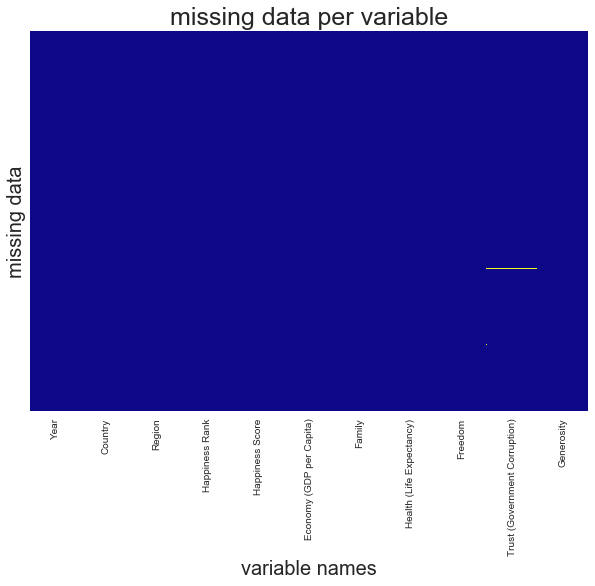

In [16]:

plt.figure (figsize=(10,7))

sns.heatmap(happiness.isnull(),yticklabels=False, cbar = False, cmap = "plasma")
plt.xlabel(xlabel = "variable names", rotation= 0, fontsize= 20)
plt.ylabel (ylabel= "missing data", fontsize = 20)
plt.title (label = "missing data per variable",  fontsize = 25)
plt.show()




we still have a few missing variables 

In [17]:
#lets look for the "Region" that are still missing

happiness [happiness["Region"].isna()]

#we see that we only have 6 missing values and will therefore, assign the regions manually 

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity


In [18]:
happiness.loc[[32,70], "Region"] =  "Eastern Asia"
happiness [happiness["Region"].isna()]

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity


In [19]:
#lets look for the missing regions in the rest of the data 
happiness [happiness.Region == "Latin America and Caribbean"]

#replacing of missing values: 
happiness.loc[[37], "Region"] =  "Latin America and Caribbean"
happiness [happiness["Region"].isna()]

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity


In [20]:
#lets look for the missing regions in the rest of the data 
happiness [happiness.Region == "Western Europe"]


#replacing of missing values: 
happiness.loc[[57], "Region"] =  "Western Europe"
happiness [happiness["Region"].isna()]


#we see that there are no missing variables in the region category! 




,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity


"""Western Europe as the Iseeland offically belongs to Turkey and 
Turkey is being classified as Western Europe in the base Dataset 
of 2015 (arguable that is not entirely true...)"""

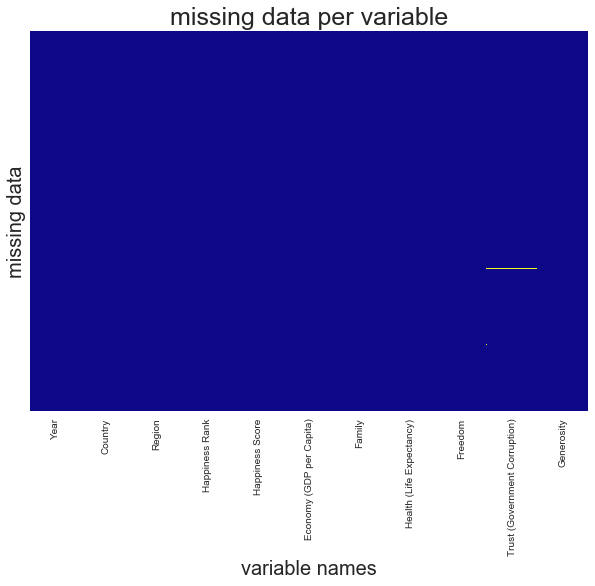

In [21]:

plt.figure (figsize=(10,7))

sns.heatmap(happiness.isnull(),yticklabels=False, cbar = False, cmap = "plasma")
plt.xlabel(xlabel = "variable names", rotation= 0, fontsize= 20)
plt.ylabel (ylabel= "missing data", fontsize = 20)
plt.title (label = "missing data per variable",  fontsize = 25)
plt.show()



Note: I just googled the regions and found out where they are and looked if we have a similar varialbe in the preperation for the replacement of the null values 

However, we see that in "Trust" some data points are still missing. Generally speaking it is always good to replace missig variables with an non-NA / non-NaN value as that will also incrase the predictabilty of our model. However, somethimes it is worth dismissing certain rows as the values is likely to be an outlier. Other options are to manually try to figure out what the value is. 

In [22]:
#finding the missing trust variable 
happiness [happiness["Trust (Government Corruption)"].isna()]

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
19,2018,United Arab Emirates,unknown,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186
19,2019,United Arab Emirates,unknown,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186


In [23]:
"""
We indeed see that the variable missed two trust data in year 2018 and 2019

Replacing the data can be made in different ways, but because we are now 
    dealing with a numeric value we have to have a better understanding of 
    the data 
"""

round (happiness.describe(), 3)

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,782.000,782.000,782.000,782.000,782.000,782.000,782.000,780.000,782.000
mean,2016.994,78.698,5.373,0.913,1.079,0.587,0.423,0.126,0.218
std,1.417,45.182,1.129,0.406,0.330,0.243,0.157,0.106,0.123
min,2015.000,1.000,2.693,0.000,0.000,0.000,0.000,0.000,0.000
25%,2016.000,40.000,4.471,0.607,0.870,0.406,0.318,0.054,0.130
50%,2017.000,79.000,5.322,0.978,1.125,0.635,0.445,0.092,0.201
75%,2018.000,118.000,6.173,1.229,1.330,0.774,0.545,0.155,0.281
max,2019.000,158.000,7.632,2.096,1.644,1.030,0.724,0.552,0.838


desision for value to replace NaN: 
    
    - We see that the mean and median are not to close with one another
    - just using one of the values whould ignore the country specific sources and also the development over the time
    - replacing it with 0 would be completely disadvisably, as even with the std in account the value is more than likely not 0 
    - because of the above mentioned we go back to the inital year data and replace the values manually

In [24]:
#we find out a few variables to decisde with what we want to replace the missing values

#average of United Arab Emirates

year_trust = happiness.loc [:,"Trust (Government Corruption)":]


mean = year_trust.mean (axis=1)
print ("Mean","\n",mean[19])

median = year_trust.median (axis = 1)
print ("\n","Median","\n",median[19])


#so ahappiness.loc[[57], "Region"] =  "Western Europe"
happiness [happiness["Trust (Government Corruption)"].isna()]


Mean 
 19    0.325055
19    0.314500
19    0.204475
19    0.186000
19    0.186000
dtype: float64

 Median 
 19    0.325055
19    0.314500
19    0.204475
19    0.186000
19    0.186000
dtype: float64


,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
19,2018,United Arab Emirates,unknown,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186
19,2019,United Arab Emirates,unknown,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186


In [25]:
# Replacing the is.na values 

happiness.loc[[19], "Trust (Government Corruption)"] =  0.18600

#we check if we have deleted all the null vales (worked!)
happiness [happiness["Trust (Government Corruption)"].isna()]


,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity


#so we have the years 2018 and 2019 means and median and we are going to use them therefore !
#namely 0.18600 ad 18600 >> hence, no change between the years which means we are dont have to account for that for the change between 2018 and 2019 but we have a change from 2017 to 2018 (decrease)

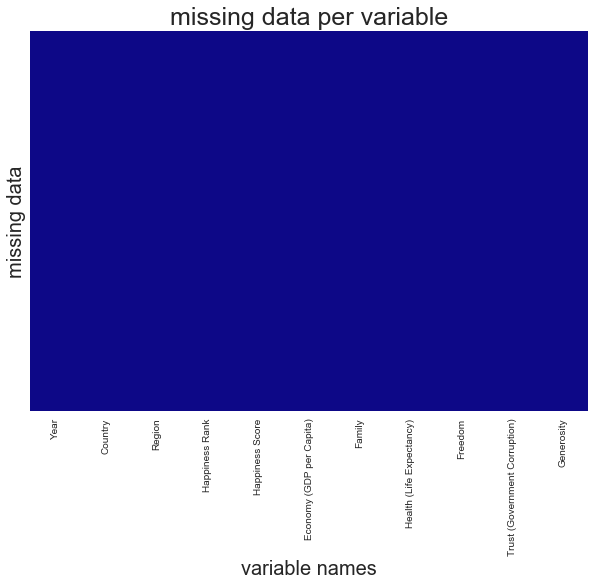

In [26]:
#one last time (hopefully)
plt.figure (figsize=(10,7))

sns.heatmap(happiness.isnull(),yticklabels=False, cbar = False, cmap = "plasma")
plt.xlabel(xlabel = "variable names", rotation= 0, fontsize= 20)
plt.ylabel (ylabel= "missing data", fontsize = 20)
plt.title (label = "missing data per variable",  fontsize = 25)
plt.show()

#we see that all the values have been replaced! 

# Visual overview 

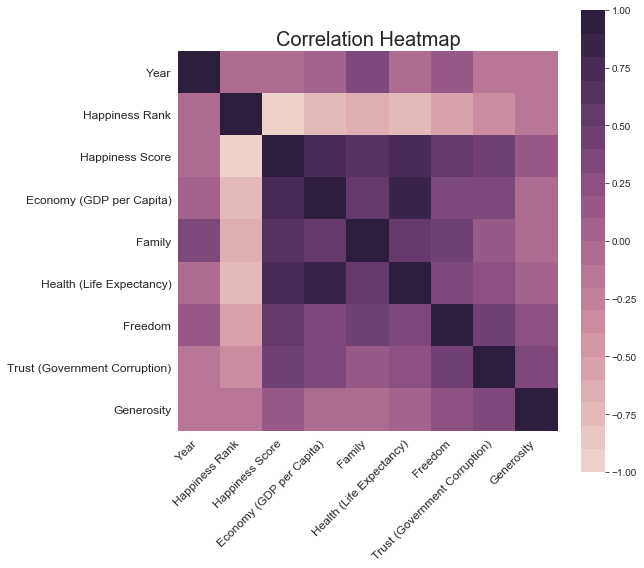

In [27]:

#correlation heatmap

#definition of the correlation of all varialbe in DataFrame
corr = happiness.corr()

fig, ax = plt.subplots(figsize = (8.5,8.5))
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center= 0, 
    cmap= sns.cubehelix_palette (20), # insert any number larger than the correlation we want to observe! 
    square = True
)

ax.set_title ("Correlation Heatmap", fontsize = 20)


ax.set_yticklabels (
    ax.get_yticklabels(), 
    fontsize = 12
)

ax.set_xticklabels (
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = "right",
    fontsize = 12
)


#if you dont iclude this line you will have the chart but will all data on top...
plt.show()

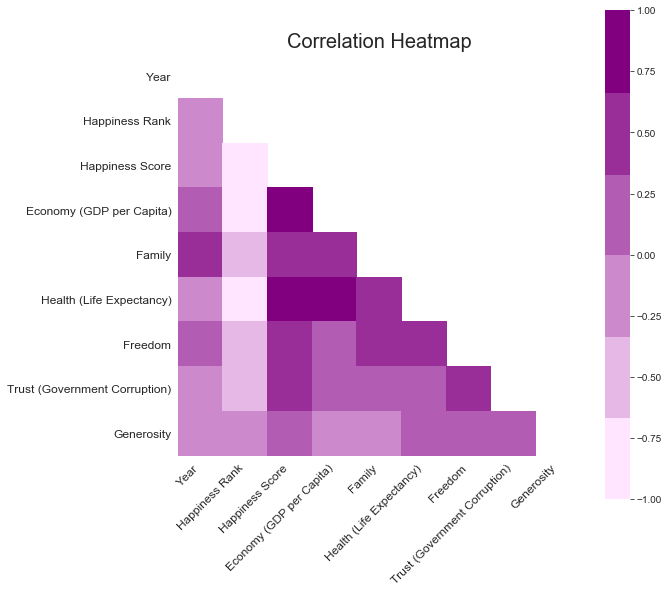

In [28]:

#correlation heatmap without mirrowing


corr = happiness.corr()
dropself= np.zeros_like (corr)
dropself [np.triu_indices_from(dropself)] = True

fig, ax = plt.subplots(figsize = (9,9))
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center= 0, 
    cmap= sns.light_palette("purple"),
    square = True, 
    mask= dropself
)

ax.set_title ("Correlation Heatmap", fontsize = 20)

ax.set_yticklabels (
    ax.get_yticklabels(), 
    fontsize = 12
)

ax.set_xticklabels (
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = "right",
    fontsize = 12
)

plt.show()

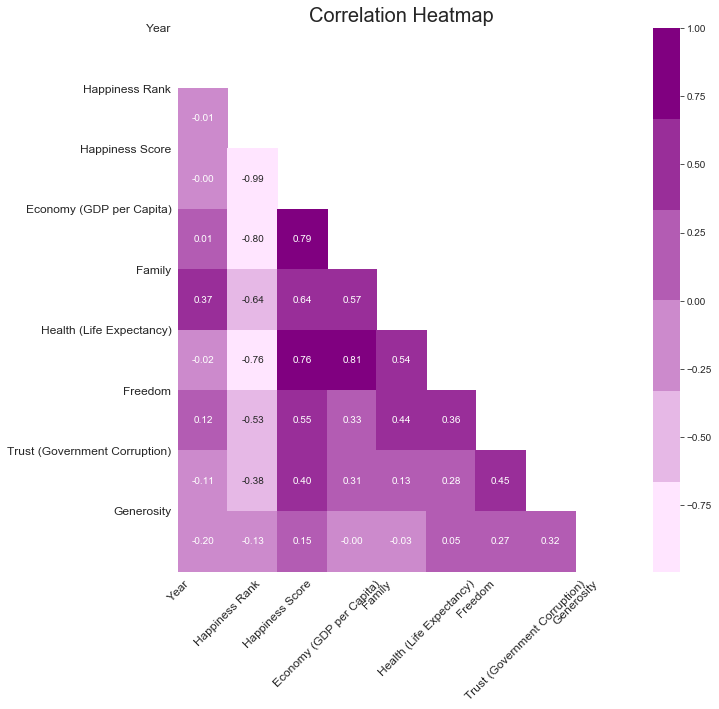

In [29]:


#correlation heatmap with correlation values included 

def halfheatmap (df, mirrow, title ): 
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (10,10))
    cmap= sns.light_palette("purple")
    ax.set_title(title, fontsize = 20)
    
    if mirrow == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")
      #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot
    
    else: 
        #drop selcorrelation
        dropself= np.zeros_like (corr)
        dropself [np.triu_indices_from(dropself)] = True
        colormap = sns.diverging_palette (200,10,as_cmap = True)
        sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", mask=dropself)
      # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns, rotation = 45, fontsize= 12);
      # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns, fontsize= 12)
        
   # show plot
    plt.show()
    
halfheatmap(df = happiness, mirrow = False, title = "Correlation Heatmap")

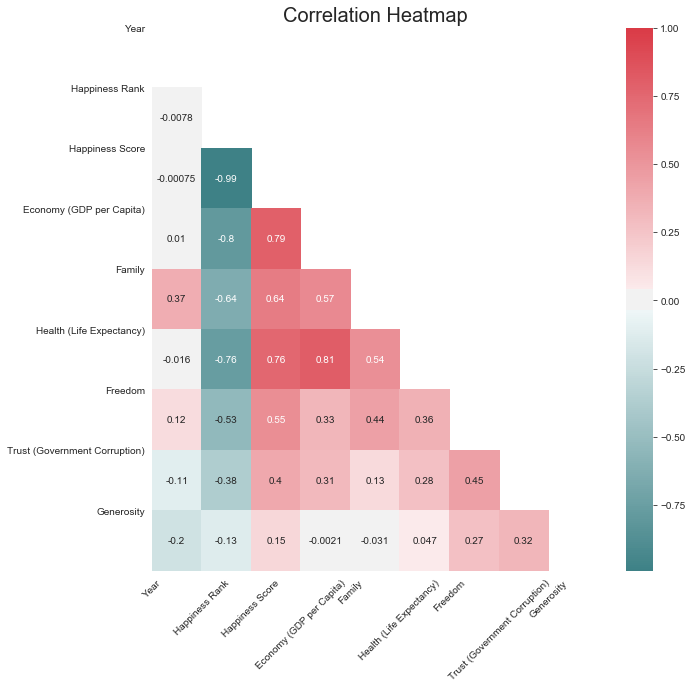

In [30]:


#correlation heatmap with other colorcode

def halfheatmap (df, mirrow, title ): 
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (10,10))
    colormap = sns.diverging_palette (220,10, as_cmap = True)
    ax.set_title(title, fontsize = 20)
    
    if mirrow == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot
    
    else: 
        #drop selcorrelation
        dropself= np.zeros_like (corr)
        dropself [np.triu_indices_from(dropself)] = True
        colormap = sns.diverging_palette (200,10,as_cmap = True)
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2g", mask=dropself)
         # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns, rotation = 45);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        
    # show plot and save it 
    plt.savefig("Happiness.Correlation.Heatmap.png")
    plt.show()
    
halfheatmap(df = happiness, mirrow = False, title = "Correlation Heatmap")

Correlation heatmap interpretation: 

Definition: 
- ether dark red or dark turquoise indicates a strong correlation (red = positive, turquoise = negative) 
- light collors show correlations coloser to 0 
- the correlations with the respective variable itself has been deleted 

Observations: 
- what we are interested is the "happiness ranking" and the "happiness sccore" 
- the next point of interest which values are influening this variables
- we observe that "Economy (GDP per Capita", "Family", and "Health (..)" seam to have the strongest influence (darkest collors) and thouse variables are futher strongly correlated which one another (which has to be taken into account for the regression discussion below) 
- the time of the observation does not seam to play a huge rule (very light colors for all other variables) >> that could indicate that the relationships have not changed over time (but caution is being required because it could also be observed that the happiness score has shifted from one country to another) 

Note: 
- the correlation heatmap only shows an overview and only (as the name suggests) the correlations and not if they are significatn to further inspect the data we need t values (below is an OLS-regression discussion) 
- I personly like a dual color code because you can if you just want to see the strengh of a relationship observe the darkness of a square and if you want to know the DIRECTION of the relationship you know it as well 

# Dicovery visualization II

The very nice feature in the follwing graph is that we can zoom in and get a clearer picture, in addition, similairly to the correlation heatmap, we see what is worth spending our attention on. Mittle line shows eachvarialbe distribution ad is helpful to if we have screwed data or exteme outliers 

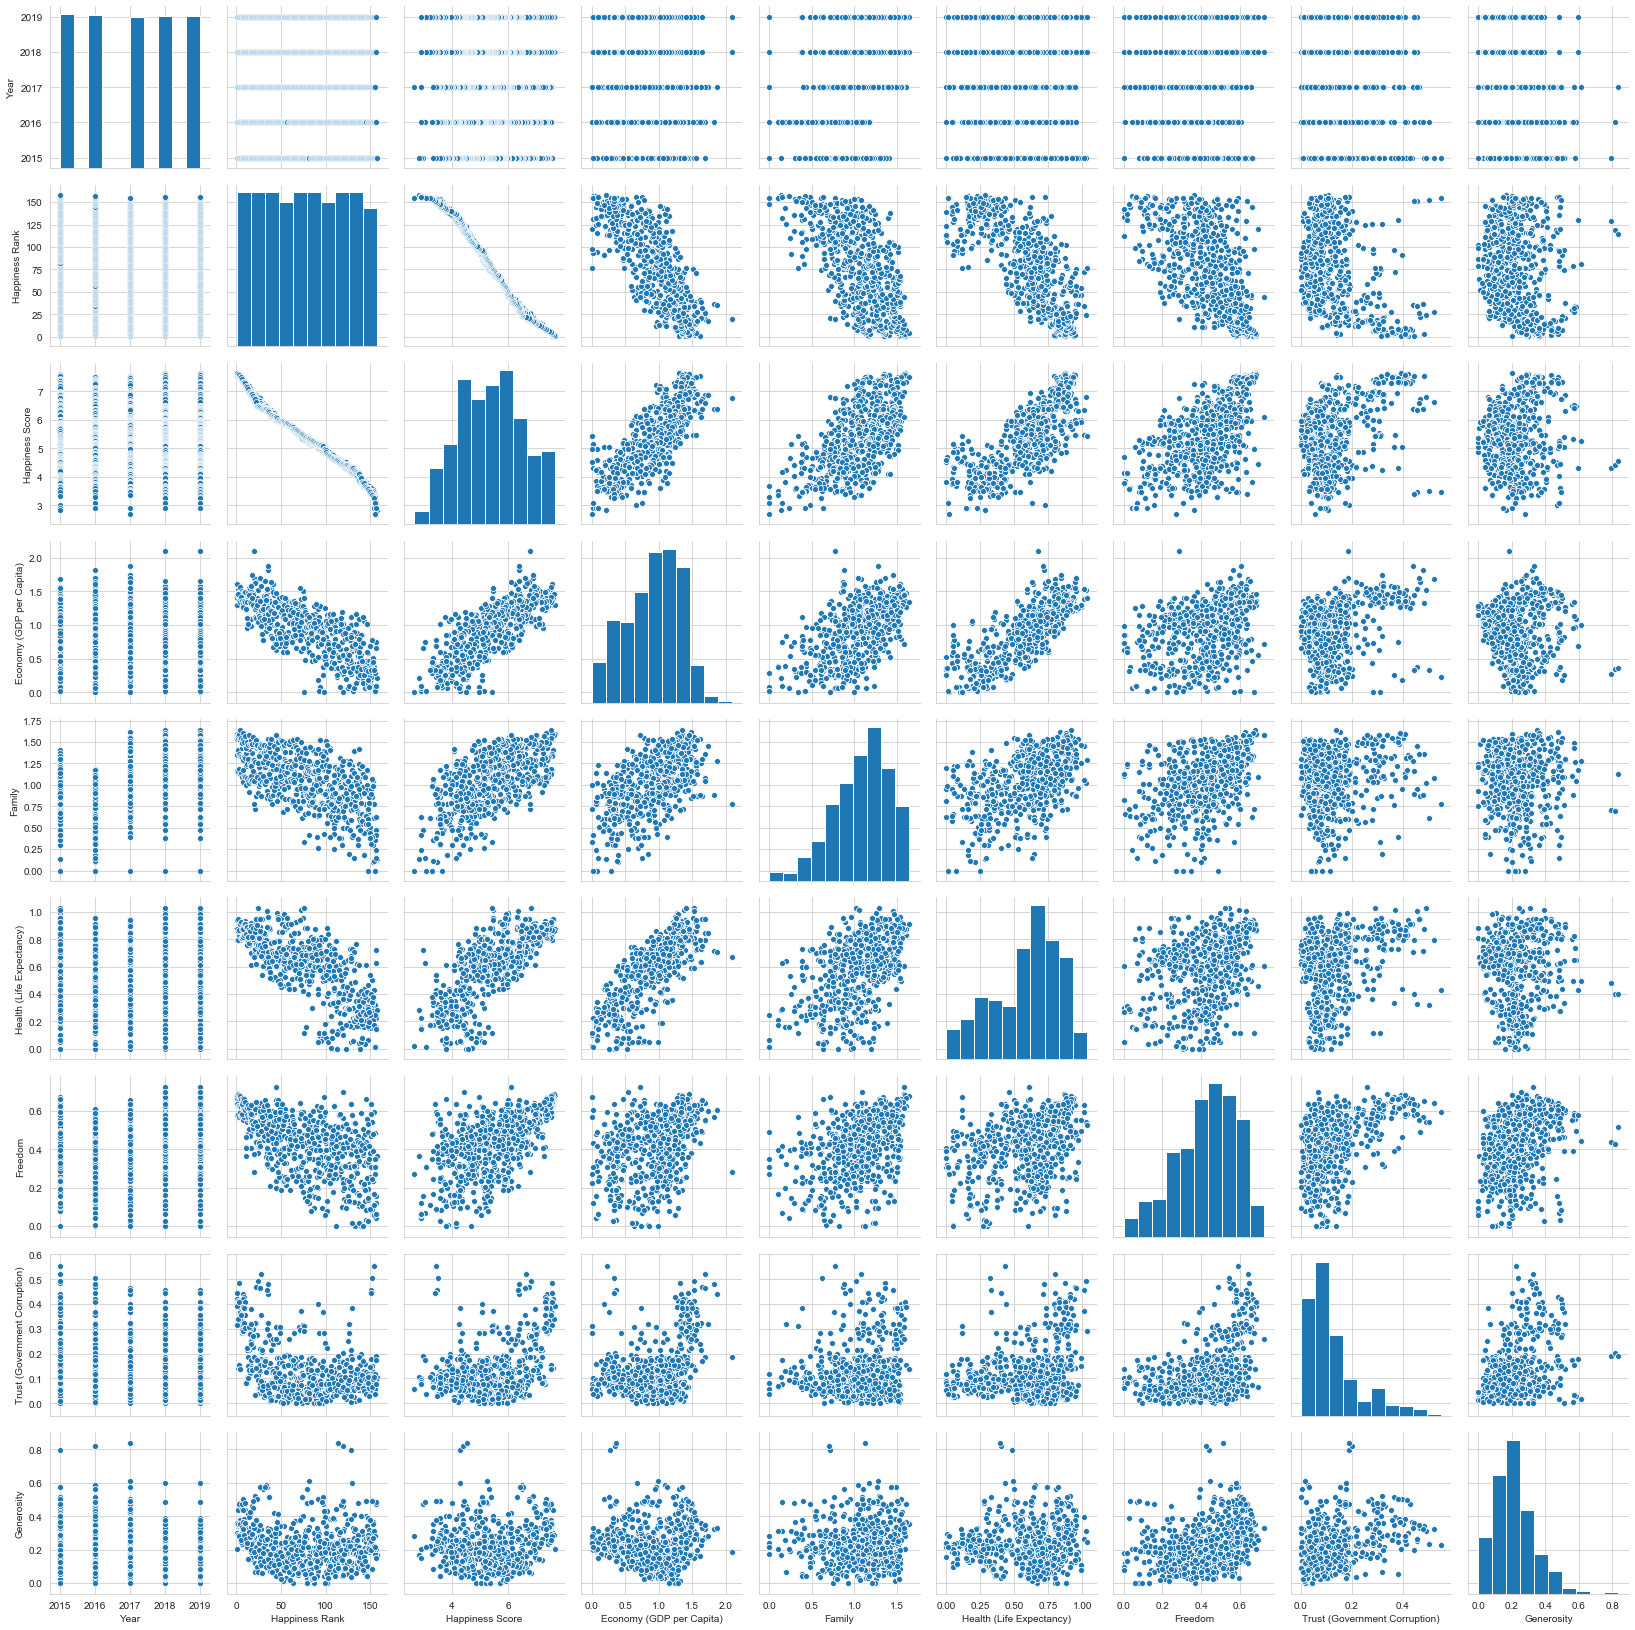

In [31]:
#overview:
sns.pairplot(happiness)
plt.show()

# OLS analysis (for all numerical indipended variables) 

prior to presenting an OLS we have to classify our target variable (also indipended or y variable)
- as happiness score and happiness rank are strongly correlated (seen in heatmap (very dark colors) and above discribtive statistic (strong non-random relationship), and inuitively it makes sence too ) we have to leave it out of our OLS model, otherwise we have a confounding variable included
- country and region are both not numberical but are likely to have an influence, we will come to that later
- Note to OSL: by default the confidence interal is 95%

In [32]:
happiness.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Year                           782 non-null    int64   
 1   Country                        782 non-null    category
 2   Region                         782 non-null    object  
 3   Happiness Rank                 782 non-null    int64   
 4   Happiness Score                782 non-null    float64 
 5   Economy (GDP per Capita)       782 non-null    float64 
 6   Family                         782 non-null    float64 
 7   Health (Life Expectancy)       782 non-null    float64 
 8   Freedom                        782 non-null    float64 
 9   Trust (Government Corruption)  782 non-null    float64 
 10  Generosity                     782 non-null    float64 
dtypes: category(1), float64(7), int64(2), object(1)
memory usage: 95.0+ KB


In [33]:
#we make the analysis with statsmodels.api as sm 

import statsmodels.api as sm 

x = happiness.iloc [:,[0,5,6,7,8,9,10]]

y = happiness["Happiness Score"]

X = sm.add_constant(x)
model = sm.OLS(y, X)
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     379.7
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          2.38e-245
Time:                        11:29:06   Log-Likelihood:                -621.44
No. Observations:                 782   AIC:                             1259.
Df Residuals:                     774   BIC:                             1296.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Note to OLS results: We have an R^2 of approx. 77% which indicates that 77% of the distribution of y (happiness score) can be explained by the underlying OLS model 
 - all included variables are significant on a 5% significantce level 
 - other than year, all variables are having a positive influence on y (happiness score)
 - if we change y to happiness rank we get almost the same results (not surprisingly as they are strongly correlated) 
 - again: please do not include happiness rank and happiness score as they would confuse the model (although it seems to be a better fit on the first glance) 
 - I advice to include more and more explainatory variables to see the contribution to the R^2 measurement 

# OLS with categorical data 

to include the regions / or countries we have to introduce dummy variables
- we include regions, as we have less of them and still want to be able to analyze the data 
- we can always zoom into one specific country later on 

In [34]:
happiness_dummy = pd.get_dummies (happiness, columns = ["Region"])
happiness_dummy.head()
happiness_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Year                                    782 non-null    int64   
 1   Country                                 782 non-null    category
 2   Happiness Rank                          782 non-null    int64   
 3   Happiness Score                         782 non-null    float64 
 4   Economy (GDP per Capita)                782 non-null    float64 
 5   Family                                  782 non-null    float64 
 6   Health (Life Expectancy)                782 non-null    float64 
 7   Freedom                                 782 non-null    float64 
 8   Trust (Government Corruption)           782 non-null    float64 
 9   Generosity                              782 non-null    float64 
 10  Region_Eastern Asia                     782 non-nu

In [36]:

import statsmodels.api as sm 

x = happiness_dummy.iloc [:,[0,4,5,6,7,8,9,10,11,12,13,14,15,16]]

y = happiness_dummy["Happiness Score"]

X = sm.add_constant(x)
model = sm.OLS(y, X)
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     207.4
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          9.47e-241
Time:                        11:30:05   Log-Likelihood:                -614.78
No. Observations:                 782   AIC:                             1258.
Df Residuals:                     768   BIC:                             1323.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

interpretation of OLS with region variable: 
- we see an imporvement in the predictability of the model (R^2 form 77% to 82%)
- the variables that have been included in the old model are still signficiant (only freedom does is only sign. on an apha of 10%)
- the region variables are all signficiant ofn the 5% alpha level 
- not surprisingly the constant is lower (this is as we have included another variable that adds to each prediction value)
- The most relevant factors are: 
    - The GDP per capiata
    - The Year
    - Freedom
    - Trust
    - Generosity 
    - the Region 
- it is important to note that the different values are very likely correlated with one another, we have also seen that in the correlation heatmap. 
- While interpreting one induencing factor (e.g. Economy) one has to pay attention to the units and model (here linear) 
- For instance: we expect the  'Happiness Score' to go up by 0.8158 if the Trust measurment score goes up by 1 point. this is true if everything else is being held constant, this is on a 5%level significance level. 

The question now is, which models should be use: clearly the model with the higher R^2 and the region dummies. 


# Visualization of observations

In [37]:
#first sorting the scores based on the regions! 

grouped_happiness = happiness.groupby (["Region"])[["Happiness Score", "Year"]].aggregate(np.median).reset_index().sort_values ("Happiness Score")
grouped_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 4 to 2
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           7 non-null      object 
 1   Happiness Score  7 non-null      float64
 2   Year             7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 224.0+ bytes


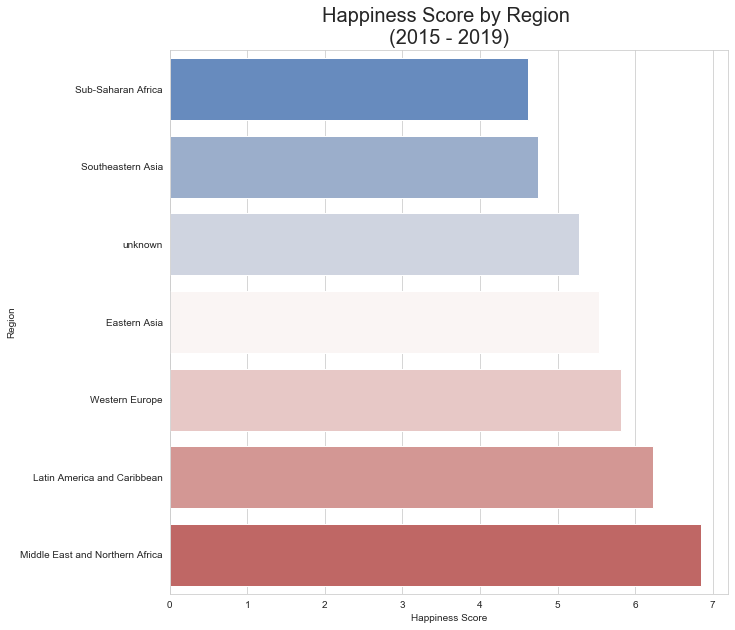

In [38]:
#plotting hte results (x and y are given like that to better allows to read the ocuntries)
chart = sns.barplot (x= grouped_happiness ["Happiness Score"],y = grouped_happiness ["Region"],saturation = 1.2, palette = "vlag"  )

chart.figure.set_size_inches (10,10)
plt.title (label = "Happiness Score by Region \n(2015 - 2019)", fontsize = 20)
plt.show()

Comment: 
- over the years the average happiness scorers have been different different evaluated regions
- Australia and New Zealand are leading the list, directly followed by North America on the bottom of the list wee see Sub-Saharan Africa

## Region and Happiness Score by year

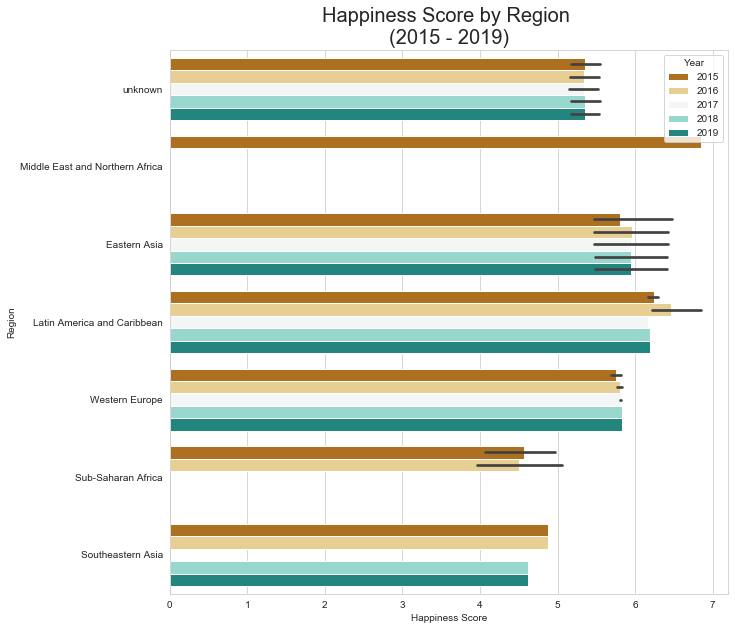

In [39]:
#plotting hte results (x and y are given like that to better allows to read the ocuntries)
plt.figure (figsize=(10,10))
chart = sns.barplot (x= happiness ["Happiness Score"],y = happiness ["Region"], palette = ("BrBG"), hue=happiness ["Year"], saturation = 1.2)
                 
plt.title (label = "Happiness Score by Region \n(2015 - 2019)", fontsize = 20)
plt.show()

Note: We see the regional happiness score in most regions slightly increasing 
    - however, in Astrilia and New Zealand stayed amost unchanged 
    - in Latin America and Caribean the happiness score declined of the time slightly
    

# Distplot (to bin regions)

/Users/anna-marietomm/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


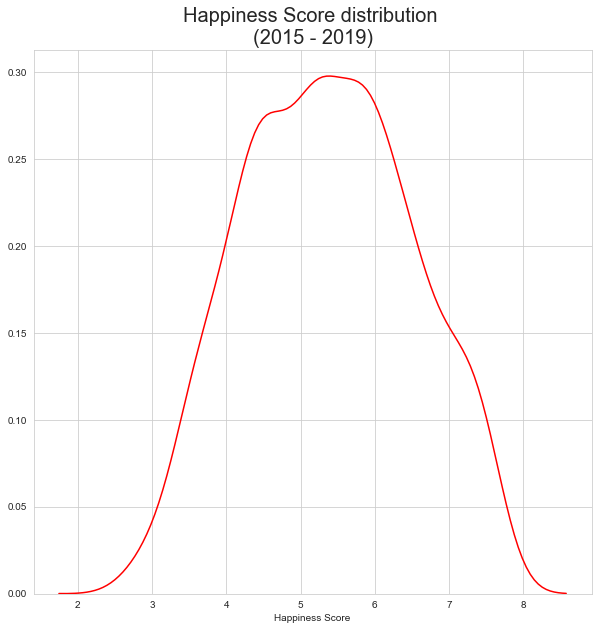

In [40]:
 
plt.figure (figsize=(10,10))

chart = sns.distplot (a= happiness ["Happiness Score"],bins= happiness ["Year"], color = "Red")
                 
plt.title (label = "Happiness Score distribution \n(2015 - 2019)", fontsize = 20)
plt.show()

comment: shows the distribtion on the average of the years for the happiness Scores

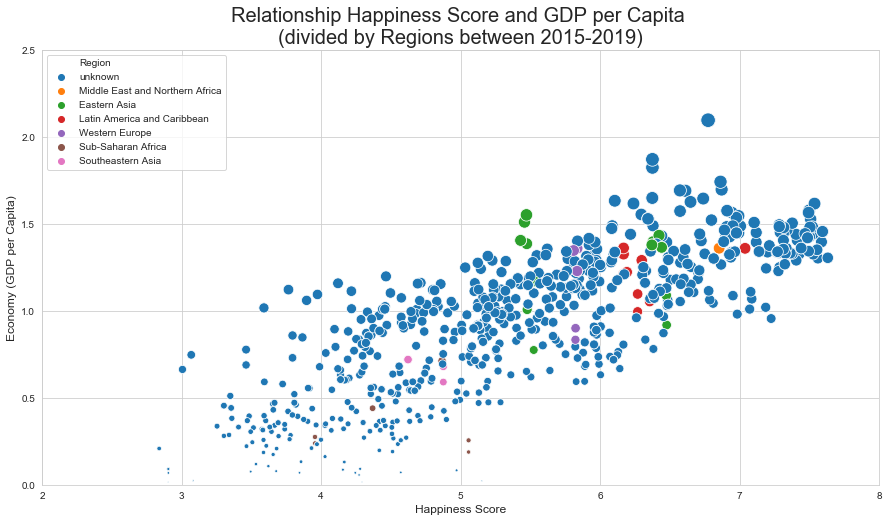

In [41]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Happiness Score', y='Economy (GDP per Capita)', hue='Region',data=happiness, s = (happiness ["Economy (GDP per Capita)"])*100)
plt.title ("Relationship Happiness Score and GDP per Capita \n(divided by Regions between 2015-2019)", fontsize = 20)
plt.xlabel('Happiness Score',size=12)
plt.ylim(0,2.5)
plt.xlim (2,8)
plt.ylabel('Economy (GDP per Capita)', size =12)
plt.show()

Comment: 
- We see a positive relationship betwen the GDP per capita and the Happiness Score
- Some regions are subsequentially lower in both measurments

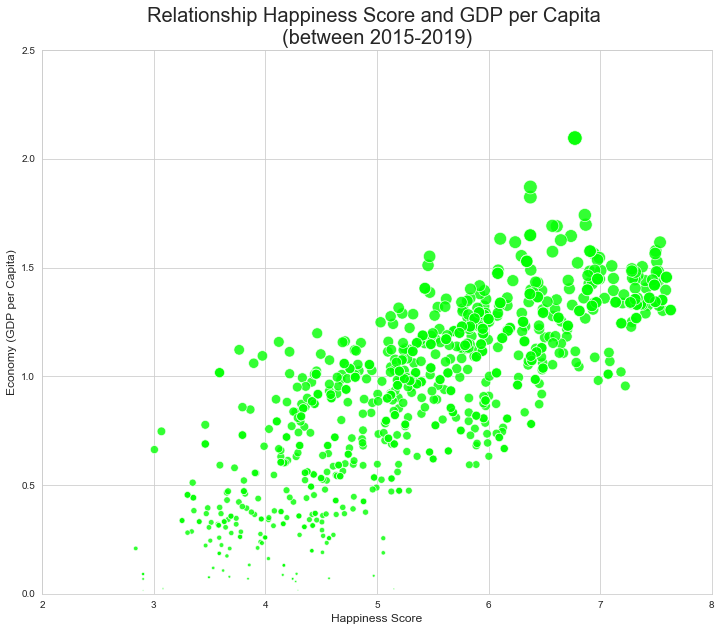

<Figure size 1080x576 with 0 Axes>

In [42]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Happiness Score', y='Economy (GDP per Capita)',data=happiness, s = (happiness ["Economy (GDP per Capita)"])*100, alpha =0.8, color = "lime")

plt.title ("Relationship Happiness Score and GDP per Capita \n(between 2015-2019)", fontsize = 20)

plt.xlabel('Happiness Score',size=12)
plt.ylim(0,2.5)
plt.xlim (2,8)
plt.ylabel('Economy (GDP per Capita)', size =12)
plt.figure(figsize=(15,8))
plt.show()

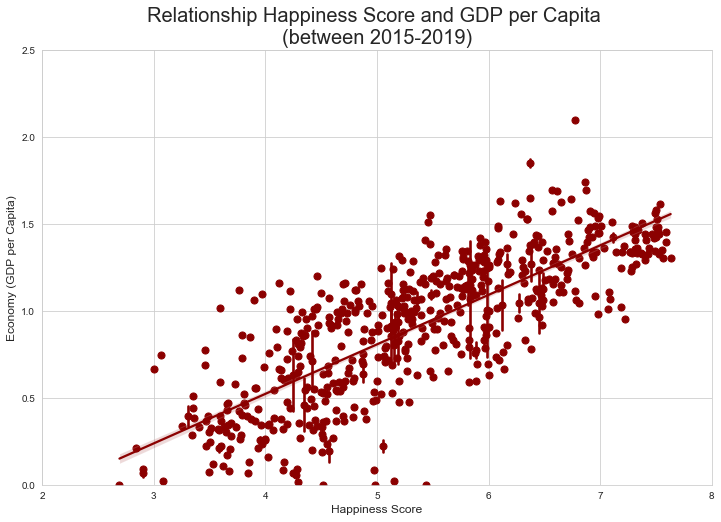

In [43]:


plt.figure(figsize=(12,8))
sns.regplot (happiness ["Happiness Score"], happiness ["Economy (GDP per Capita)"], x_estimator=np.mean, ci = 80, color = "darkred")           
plt.title ("Relationship Happiness Score and GDP per Capita \n(between 2015-2019)", fontsize = 20)

plt.xlabel('Happiness Score',size=12)
plt.ylim(0,2.5)
plt.xlim (2,8)
plt.ylabel('Economy (GDP per Capita)', size =12)
plt.show()

In [44]:
#for the following we need at least version 3.4+ (so we have a look)

import sys 

print (sys.version)

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


# From OLS to Machine Learning (ML) 

- one aspect of looking at data is to explain what happend and what is happening at the moment
- antoher factor is to predict what the future might hold and what the influencing factors are 
- in order to get there ML is a powerful tool to help us to see how the a specific area of life might look like and what factors have which influence on them. 
- there are differnent types of machine learning (supervised, unsupervised, reinforcement,  have a look at the other forms and a neat explaination: https://machinelearningmastery.com/types-of-learning-in-machine-learning/) 
- we are going to supervised learning, as we have a clear target variable (Y = "Happiness Score") and labeled input data, we are specifically interested how the different influending factors (like GDP, Generosity,...) are influencing the depended variable (Y) and how that has changed over time and between countries. 


In [45]:
#import additional libaries 

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

In [46]:
#definition of dependend (y= target) and indipendend variables (xns)
#note: we are not including everyhting (only the dummy and numerical values)

X= happiness_dummy.iloc [:,[0,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19]]
y = happiness_dummy.iloc [:, 3] #target, what we are interested in
X.head() #check if it worked 

IndexError: positional indexers are out-of-bounds

We need a test dataset as we are aiming to predict data the computer/machine has never seen and we have to "test" if our trainng data set has helped to produce a model that is able to predict accurate results. 

In [ ]:
#establish training and test sets 

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size =0.2)

In [ ]:
#create linear regression

reg = LinearRegression()


In [ ]:
reg.fit(X_train, y_train)

In [ ]:
#predict the test data (80% of dataset)
y_pred = reg.predict (X_test)

In [ ]:
#comute the root mean squared error (RMSE)
rmse = np.sqrt (mean_squared_error(y_test, y_pred))
print ("RMSE: {}". format(rmse))

#note between 0.45 and 0.52 that is a very high fluctratin rate! 

NOTE(!): everytime you run the code you expect a different error. The reason for that is that the dataset is randomly split into parts of 0.8 and 0.2 and trains and test on different datapoints every time. By setting a sead you could prevent that, but we don´t want that as we dont know if we then have to deal with a high or low error. The following shows a more reliable solution. 

# Cross Validation

In order to avoid the fluctration of the model and have a more reliable error we create various folds (dependend on the dataset, we use eight). The ML algorithm is tested on one fold and afterwards fitted on the remainig data. The mean of the fold scores is being usded and presents a more accurate and less fluctrative model estimator. 

- cv = cross validation

In [ ]:
def regression_mode_cv( model, k = 8): 
    scores = cross_val_score (model, X, y, scoring = "neg_mean_squared_error", cv = k)
    
    rmse= np.sqrt(-scores)
    print ("Reg rmse:", rmse)
    print("Reg mean: ", rmse.mean())
    print("Reg mean:", rmse.mean())

In [ ]:
#prints the 8 rsme and then the mean
regression_mode_cv(LinearRegression())

Very briefly but we have to say about why ML model do perform badly:   
- underfitting: 
    - a model that is not able to capture the variety of the data as it is not enough complex (performs bad on test and training dataset) 
- overfitting: 
    - a model that is to complex and captures the "noise", this model fits the training data perfectly well but does not recognize the underlying pattern of the data (and that what is ultimelelty of interest) 
    - nowerdays, overfitting is the bigger problem as often data is readily availabe
    
- optimum: 
    - directly inbetween the two (the polynom degree and the error of the predicton is at the lowest) 
    
Please see the explanatory picture below: 


In [ ]:
    
img= mpimg.imread("overfitting underfitting.png")
plt.figure(figsize=(15,11)) #make picture larger 
imgplot = plt.imshow(img) 
plt.axis ("off") #remove the axis and tickers 
plt.show()

regulaized alternatives to linear regression: 

In [ ]:
#Ridge model

from sklearn.linear_model import Ridge
regression_mode_cv(Ridge())

Note to ridge model: slightly better score than the linear regression. Partly overcomes the overfitting problem.
    

In [ ]:
#Lasso model 

from sklearn.linear_model import Lasso
regression_mode_cv(Lasso())

Note to Lasso: 
- does not perform better than  linear regression. 
- this is because the default alpha is not set accurately
    

Note: 
- if you want me to write a post about the differnt models avaialbe and/ or over and underfitting, let me know! 
- the reason why I am not going into detail here is that is would easily take the same space than the rest of the code! 


# Continue Data Visiualization

We are not looking at single factors that we have identified as highly relevant for the happiness score

In [ ]:
#barplot for economy 
figure = sns.violinplot(happiness_dummy["Year"], happiness_dummy["Happiness Score"])
figure.figure.set_size_inches (10,7)
#plt.savefig("Age_Attrition.png")
plt.show()


In [ ]:
plt.title ("Infuence of time on Happiness Score", fontsize= 20)

figure = sns.regplot(happiness_dummy["Year"], happiness_dummy["Happiness Score"], x_estimator=np.mean, x_bins = 15, color = "darkred", ci = 90)
figure.figure.set_size_inches (10,7)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Happiness Score", fontsize = 15)
plt.show()

Comment on Regression year: we bassically see, that the inlfuence of the years was slightly negative but not significant on the happiness score 

In [ ]:
plt.title ("Infuence of Freedom on Happiness Score", fontsize= 20)

figure = sns.regplot(happiness_dummy["Freedom" ], happiness_dummy["Happiness Score"], x_estimator=np.mean, x_bins = 15, color = "darkred", ci = 90)
figure.figure.set_size_inches (10,7)
plt.xlabel("Freedom Score", fontsize = 15)
plt.ylabel("Happiness Score", fontsize = 15)
plt.show()

comment on 'Freedom' Regression: We observe that the score of freedom has indeed an positive influence on the happiness score (altough only significant on the 10% sig. level)

In [ ]:
figure = sns.scatterplot(happiness_dummy["Family"],happiness_dummy["Happiness Score"], color = "darkred")

figure.figure.set_size_inches (10,7)

plt.show()

We observe an positive correlation between more family members and the happiness score, interestingly enough we do not seem to see a tipping point, it just seems the more family members the better 

In [ ]:
figure = sns.lineplot(happiness_dummy["Family"],happiness_dummy["Happiness Score"], color = "navy")

figure.figure.set_size_inches (10,7)

plt.show()

lineplot can be good to show the variation in data and simultanously show a trend 

So: Why are we happy? 
    

Unfortunately, I can not answer this question. But I can say that with this dataset a clear correlation of the observable factors like the wealth of a country (GDP), the number of family members, and non curuption are adding to happiness. Furhter, self reported factors like Generosity influence postively as well. All that is can be observed, and further there seems to be a constant difference between the regions in our world (constant in that sense that the relationships don´t change over time). Very likely variables like the environment, the future outlook and the friendliness for doing business also add to the happiness of people. Whatsoever, the dataset gives a interesting glimes into what happiness is made of. And we should keep in mind, the data is accumulated and does not present individuals subjective stance about happiness or anything else. 